In [1]:
import pandas as pd 

In [2]:

%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

In [4]:
#join two datasets
df = pd.concat([X,y], axis="columns")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df["pass"] = df.apply(lambda row: 1 if (row["G1"]+row["G2"]+row["G3"]) >= 35 else 0, axis=1)
df = df.drop(["G1","G2","G3"], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
pass           int64
dtype: object

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'pass'],
      dtype='object')

In [8]:
#one-hot encoding
df = pd.get_dummies(df, columns=['school', 'sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'], dtype='int') 

In [9]:

df.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
pass                 int64
school_GP            int32
school_MS            int32
sex_F                int32
sex_M                int32
address_R            int32
address_U            int32
famsize_GT3          int32
famsize_LE3          int32
Pstatus_A            int32
Pstatus_T            int32
Mjob_at_home         int32
Mjob_health          int32
Mjob_other           int32
Mjob_services        int32
Mjob_teacher         int32
Fjob_at_home         int32
Fjob_health          int32
Fjob_other           int32
Fjob_services        int32
Fjob_teacher         int32
reason_course        int32
reason_home          int32
reason_other         int32
r

In [10]:
#preparing training and test data

#shuffle rows
df = df.sample(frac=1)
df_train = df[:500]
df_test = df[500:]

df_train_att = df_train.drop(["pass"], axis=1)
df_train_pass = df_train["pass"]

df_test_att = df_test.drop(["pass"], axis=1)
df_test_pass = df_test["pass"]

df_att = df.drop(["pass"], axis=1) 
df_pass = df["pass"]

In [11]:
#number of passing students in whole dataset
import numpy as np 
print("passing: %d out of %d (%.2f%%)" % (np.sum(df_pass), len(df_pass), 100*float(np.sum(df_pass)/len(df_pass))))  

passing: 328 out of 649 (50.54%)


In [12]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
#fit a decision tree 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 5)
t = t.fit(df_train_att, df_train_pass)

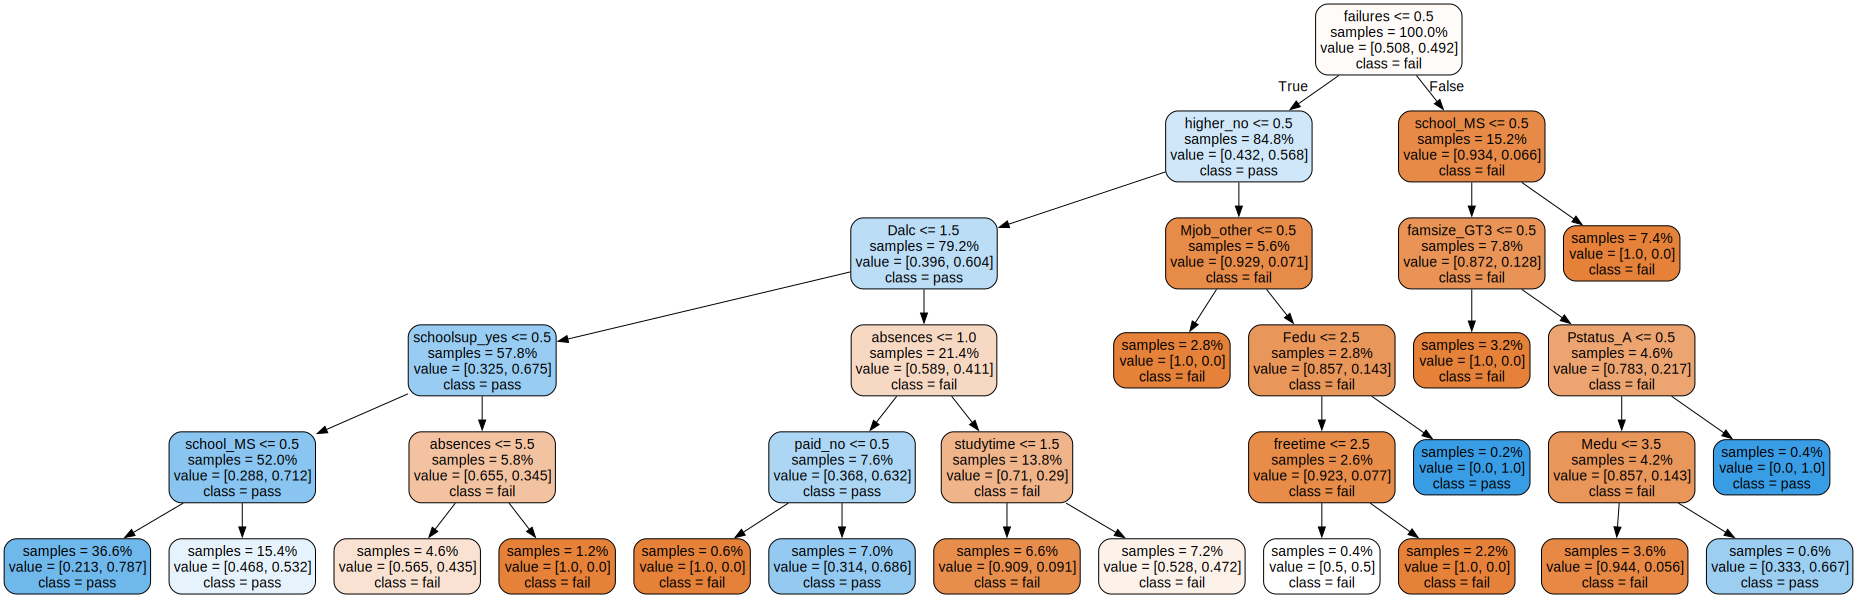

In [14]:
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True, feature_names=list(df_train_att), class_names=["fail","pass"], filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph 

In [15]:
t.score(df_test_att, df_test_pass)

0.6644295302013423

In [16]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, df_att, df_pass, cv=5)
#show average score +/- two standard deviations away (covering 95% of scores)
print("Accuracy %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy 0.68 (+/- 0.10)


In [17]:
#various choices to make regarding max_depth 
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    scores = cross_val_score(t, df_att, df_pass, cv=5)
    print("Max depth %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth 1, Accuracy: 0.62 (+/- 0.06)
Max depth 2, Accuracy: 0.69 (+/- 0.04)
Max depth 3, Accuracy: 0.67 (+/- 0.10)
Max depth 4, Accuracy: 0.68 (+/- 0.05)
Max depth 5, Accuracy: 0.69 (+/- 0.11)
Max depth 6, Accuracy: 0.67 (+/- 0.07)
Max depth 7, Accuracy: 0.66 (+/- 0.09)
Max depth 8, Accuracy: 0.66 (+/- 0.09)
Max depth 9, Accuracy: 0.67 (+/- 0.10)
Max depth 10, Accuracy: 0.65 (+/- 0.09)
Max depth 11, Accuracy: 0.66 (+/- 0.07)
Max depth 12, Accuracy: 0.65 (+/- 0.08)
Max depth 13, Accuracy: 0.65 (+/- 0.08)
Max depth 14, Accuracy: 0.65 (+/- 0.04)
Max depth 15, Accuracy: 0.65 (+/- 0.07)
Max depth 16, Accuracy: 0.63 (+/- 0.04)
Max depth 17, Accuracy: 0.64 (+/- 0.04)
Max depth 18, Accuracy: 0.64 (+/- 0.04)
Max depth 19, Accuracy: 0.64 (+/- 0.05)


In [18]:
depth_acc = np.empty((19,3), float)
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    scores = cross_val_score(t, df_att, df_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
depth_acc

array([[ 1.        ,  0.62100179,  0.05836718],
       [ 2.        ,  0.68722719,  0.03660483],
       [ 3.        ,  0.66862254,  0.1044457 ],
       [ 4.        ,  0.68252832,  0.05603253],
       [ 5.        ,  0.68713178,  0.10877908],
       [ 6.        ,  0.67023256,  0.05774141],
       [ 7.        ,  0.65788909,  0.089175  ],
       [ 8.        ,  0.66250447,  0.11389528],
       [ 9.        ,  0.67330948,  0.1248168 ],
       [10.        ,  0.66564103,  0.10725675],
       [11.        ,  0.65631485,  0.08821316],
       [12.        ,  0.65485987,  0.08092581],
       [13.        ,  0.65019678,  0.07699862],
       [14.        ,  0.6532737 ,  0.0939201 ],
       [15.        ,  0.64560525,  0.04569087],
       [16.        ,  0.63174717,  0.04880743],
       [17.        ,  0.62405486,  0.05739702],
       [18.        ,  0.6363864 ,  0.0650398 ],
       [19.        ,  0.63019678,  0.03378369]])

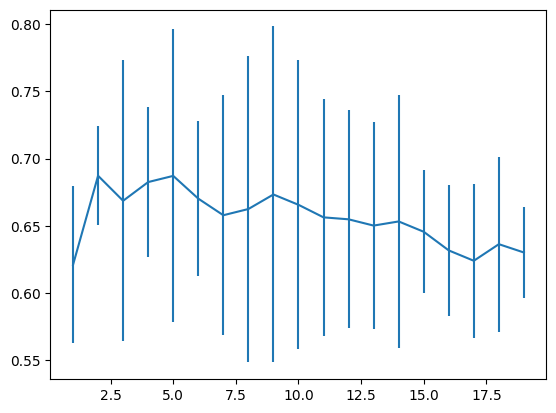

In [19]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

In [20]:
def entropy(p):
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

def information_gain(parent_labels, left_labels, right_labels):
    parent_entropy = entropy(np.bincount(parent_labels) / len(parent_labels))
    left_entropy = entropy(np.bincount(left_labels) / len(left_labels))
    right_entropy = entropy(np.bincount(right_labels) / len(right_labels))
    n_left, n_right, n_total = len(left_labels), len(right_labels), len(parent_labels)
    weighted_entropy = (n_left/n_total) * left_entropy + (n_right/n_total) * right_entropy
    return parent_entropy - weighted_entropy

# Latih decision tree (gunakan data asli yang sudah di-preprocessing)
# df_train: DataFrame training, 'pass' sebagai target
X = df_train.drop(["pass"], axis=1)
y = df_train["pass"]
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf = clf.fit(X, y)

def get_node_info(clf, X, y):
    tree_ = clf.tree_
    feature_names = X.columns
    node_count = tree_.node_count
    children_left = tree_.children_left
    children_right = tree_.children_right
    feature = tree_.feature
    threshold = tree_.threshold

    info_gain_list = []
    node_samples_idx = {0: np.arange(len(X))}

    def get_parent_idx(node):
        for n in range(node_count):
            if children_left[n] == node or children_right[n] == node:
                parent_idx = node_samples_idx[n]
                feat = feature[n]
                thresh = threshold[n]
                if node == children_left[n]:
                    idx = parent_idx[X.iloc[parent_idx, feat] <= thresh]
                else:
                    idx = parent_idx[X.iloc[parent_idx, feat] > thresh]
                node_samples_idx[node] = idx
                return idx
        return np.array([])

    def recurse(node):
        if children_left[node] == children_right[node]:
            return
        if node == 0:
            parent_idx = np.arange(len(X))
        else:
            parent_idx = get_parent_idx(node)

        feat = feature[node]
        thresh = threshold[node]

        left_idx = parent_idx[X.iloc[parent_idx, feat] <= thresh]
        right_idx = parent_idx[X.iloc[parent_idx, feat] > thresh]

        parent_labels = y.iloc[parent_idx].values
        left_labels = y.iloc[left_idx].values
        right_labels = y.iloc[right_idx].values

        ig = information_gain(parent_labels, left_labels, right_labels)

        info_gain_list.append({
            'node': node,
            'feature': feature_names[feat],
            'threshold': thresh,
            'information_gain': ig,
            'samples_parent': len(parent_labels),
            'samples_left': len(left_labels),
            'samples_right': len(right_labels)
        })

        recurse(children_left[node])
        recurse(children_right[node])

    recurse(0)
    return info_gain_list

# Jalankan fungsi pada data train
info_gain_nodes = get_node_info(clf, X, y)

# Tampilkan hasil
for node in info_gain_nodes:
    print(f"Node {node['node']}: Feature '{node['feature']}', Threshold {node['threshold']:.2f}, "
          f"Information Gain {node['information_gain']:.4f}, "
          f"Samples (parent/left/right): {node['samples_parent']}/{node['samples_left']}/{node['samples_right']}")

Node 0: Feature 'failures', Threshold 0.50, Information Gain 0.1101, Samples (parent/left/right): 500/424/76
Node 1: Feature 'higher_yes', Threshold 0.50, Information Gain 0.0571, Samples (parent/left/right): 424/28/396
Node 2: Feature 'Mjob_other', Threshold 0.50, Information Gain 0.0754, Samples (parent/left/right): 28/14/14
Node 4: Feature 'Fedu', Threshold 2.50, Information Gain 0.2284, Samples (parent/left/right): 14/13/1
Node 5: Feature 'freetime', Threshold 2.50, Information Gain 0.2374, Samples (parent/left/right): 13/2/11
Node 9: Feature 'Dalc', Threshold 1.50, Information Gain 0.0407, Samples (parent/left/right): 396/289/107
Node 10: Feature 'schoolsup_yes', Threshold 0.50, Information Gain 0.0370, Samples (parent/left/right): 289/260/29
Node 11: Feature 'school_MS', Threshold 0.50, Information Gain 0.0454, Samples (parent/left/right): 260/183/77
Node 14: Feature 'absences', Threshold 5.50, Information Gain 0.1460, Samples (parent/left/right): 29/23/6
Node 17: Feature 'absenc

In [21]:
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(df_train_att, df_train_pass)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Pastikan model sudah dilatih sebelumnya:
# t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
# t = t.fit(df_train_att, df_train_pass)

# Prediksi pada data test
y_pred = t.predict(df_test_att)

# Metrik evaluasi utama
accuracy = accuracy_score(df_test_pass, y_pred)
precision = precision_score(df_test_pass, y_pred, zero_division=0)
recall = recall_score(df_test_pass, y_pred, zero_division=0)
f1 = f1_score(df_test_pass, y_pred, zero_division=0)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Classification report (detail per kelas)
print("\nClassification Report:\n", classification_report(df_test_pass, y_pred, zero_division=0, target_names=["fail", "pass"]))

# Confusion matrix (opsional, untuk analisis error)
print("\nConfusion Matrix:\n", confusion_matrix(df_test_pass, y_pred))


Accuracy:  0.6644
Precision: 0.6860
Recall:    0.7195
F1 Score:  0.7024

Classification Report:
               precision    recall  f1-score   support

        fail       0.63      0.60      0.62        67
        pass       0.69      0.72      0.70        82

    accuracy                           0.66       149
   macro avg       0.66      0.66      0.66       149
weighted avg       0.66      0.66      0.66       149


Confusion Matrix:
 [[40 27]
 [23 59]]
